In [1]:
# Paso 0: Importar librerias necesarias

import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0
...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2021-03-24,0.802000,0.822000,0.786500,0.819500,0.751219,2616012
44001,35,UNI,Unicaja,2021-03-23,0.770000,0.807500,0.762500,0.802500,0.735636,2436213
44002,35,UNI,Unicaja,2021-03-22,0.780000,0.780500,0.760000,0.764000,0.700343,1420069
44003,35,UNI,Unicaja,2021-03-30,0.867000,0.878500,0.855500,0.877500,0.804387,3028721


In [3]:
# Paso 2: Filtrar el DF considerando el periodo post covid (desde 2021 - Act.)


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

fecha_inicio = pd.to_datetime('2021-01-01')
fecha_actual = pd.to_datetime('2024-03-04')  # Fecha actual

df_filtrado = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_actual)]

In [4]:
# Paso 3: Seleccionar solo variable numéricas

df_numerico = df_filtrado.select_dtypes(include='number')

df_numerico


,id,open,high,low,close,adj close,volume
1,1,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,179.699997,179.699997,172.300003,173.600006,164.630966,0
5,1,178.000000,179.600006,177.600006,179.000000,169.751953,0
...,...,...,...,...,...,...,...
44000,35,0.802000,0.822000,0.786500,0.819500,0.751219,2616012
44001,35,0.770000,0.807500,0.762500,0.802500,0.735636,2436213
44002,35,0.780000,0.780500,0.760000,0.764000,0.700343,1420069
44003,35,0.867000,0.878500,0.855500,0.877500,0.804387,3028721


<Figure size 1500x1000 with 0 Axes>

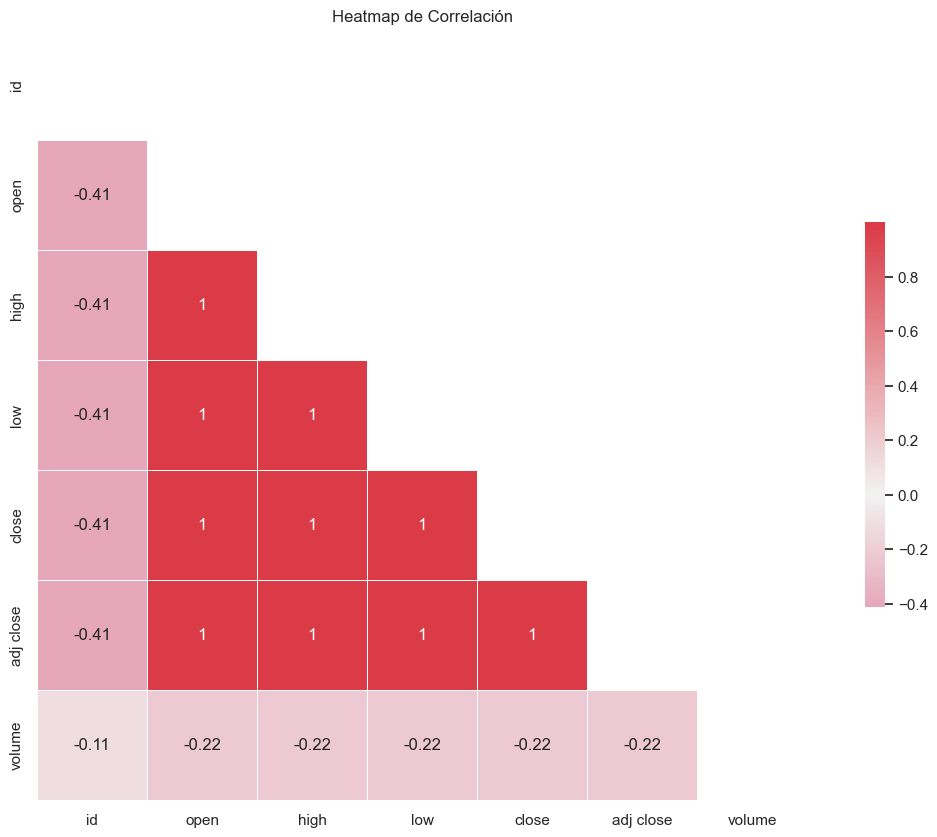

In [5]:
# Paso 5: Construir un heatmap para analizar correlaciones

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que df_filtrado esté definido y tenga datos válidos

plt.figure(figsize=(15, 10))

sns.set_theme(style='white')

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(df_numerico.corr(), dtype=bool))

cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(df_numerico.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},
            ax=ax)  # Usa el eje creado

plt.title('Heatmap de Correlación')
plt.show()

In [6]:
# Paso 6:  Filtrar datos para analizar empresa Acciona

acciona = df_filtrado.loc[df_filtrado['empresa'] == 'Acciona']

acciona



,id,ticker,empresa,date,open,high,low,close,adj close,volume
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0
5,1,ANA,Acciona,2022-06-20,178.000000,179.600006,177.600006,179.000000,169.751953,0
...,...,...,...,...,...,...,...,...,...,...
1147,1,ANA,Acciona,2021-05-21,137.899994,139.899994,137.899994,138.899994,127.729202,0
1148,1,ANA,Acciona,2021-05-20,137.000000,138.100006,136.000000,137.600006,126.533760,0
1149,1,ANA,Acciona,2021-05-19,135.899994,137.300003,135.300003,136.600006,125.614174,0
1150,1,ANA,Acciona,2021-05-17,135.600006,137.000000,134.800003,135.500000,124.602654,0


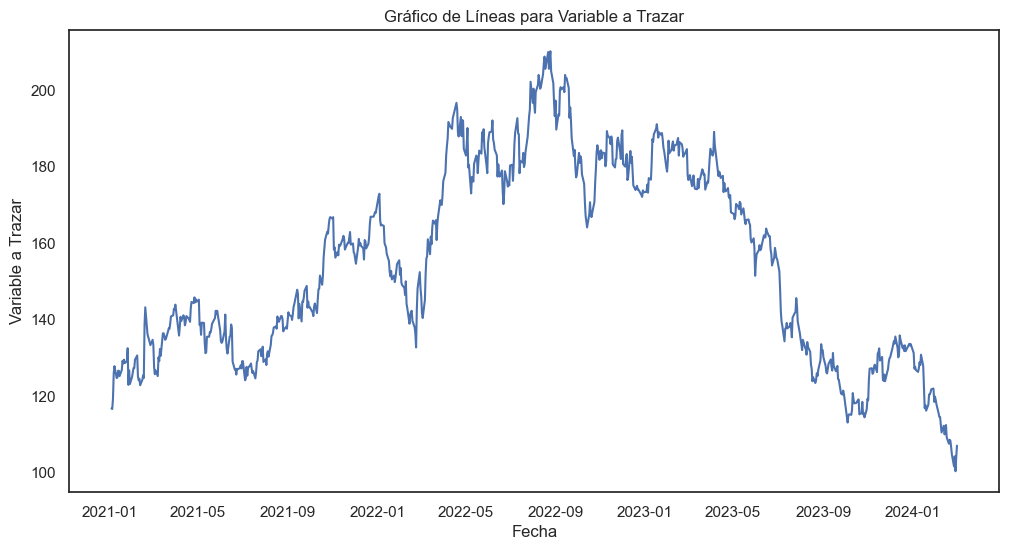

In [9]:
# Paso 7: Analizar la distribución del cierre de las acciones en su serie temporal

acciona = acciona.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(acciona['date'], acciona['close'], marker='None', linestyle='-', color='b')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Variable a Trazar')
plt.title('Gráfico de Líneas para Variable a Trazar')

# Mostrar el gráfico
plt.show()

In [10]:
# Paso 8:  Separar las 'X' de la 'y'

X= acciona.drop(['close','id','ticker','empresa','date'],axis=1)
y= acciona.close

In [11]:
# Paso 9: Aplicar el split para el entrenamiento y el testeo del modelo

from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((648, 5), (163, 5), (648,), (163,))

In [12]:
# Paso 10: Importar todo los modelos de regresión

from sklearn.linear_model import LinearRegression as LinReg   # alias es mio
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2
from sklearn.svm import SVR  # support vector regressor
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio


In [13]:
# Paso 11: Llamar a los modelos de regresión seleccionados

linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
svr=SVR()
rfr=RFR()
etr=ETR()
gbr=GBR()
xgbr=XGBR()
ctr=CTR()

In [14]:
# Paso 12: Entrenar los modelos de regresión seleccionados

linreg.fit(X_train, y_train)   
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
svr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
ctr.fit(X_train, y_train, verbose=0)

In [15]:
# Paso 13: Predicción modelo de Regresión Lineal

linreg.predict(X_test)[:10]
y_pred = linreg.predict(X_test)

mse(y_test, y_pred, squared=False) 

1.0057505725993325

In [16]:
# Paso 13: Predicción del modelo Regularización 1

lasso.predict(X_test)[:10]

y_pred=lasso.predict(X_test)

mse(y_test, y_pred, squared=False) 

1.4434231157937294

In [17]:
# Paso 13: Predicción del modelo Regularización 2

ridge.predict(X_test)[:10]

y_pred=ridge.predict(X_test)

mse(y_test, y_pred, squared=False)

1.0060762270725438

In [18]:
# Paso 13: Predicción del modelo Regularización 1+2

elastic.predict(X_test)[:10]

y_pred=elastic.predict(X_test)

mse(y_test, y_pred, squared=False)

1.3817241750477376

In [19]:
# Paso 13: Predicción del modelo Random Forest

rfr.predict(X_test)[:10]

# rfr

y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE


1.2946565821774592

In [20]:
# Paso 13: Predicción del modelo Extra Regressor

etr.predict(X_test)[:10]


y_pred=etr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

1.5327408596928054

In [21]:
# Paso 13: Predicción del modelo XGBR

xgbr.predict(X_test)[:10]

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

1.4703211552588513

In [22]:
# Paso 13: Predicción del modelo Catboost

ctr.predict(X_test)[:10]

y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

1.767623038735508

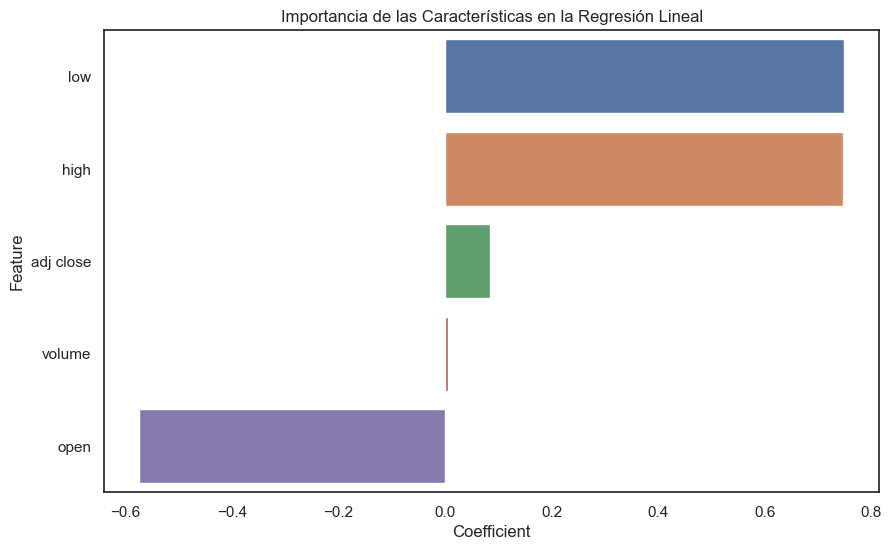

In [23]:
# Paso 14: Analizar la importancia de cada variable

linreg = LinReg()
linreg.fit(X_train, y_train)

# Obtener los coeficientes (pesos) de cada característica
coeficientes = linreg.coef_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coeficientes})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Importancia de las Características en la Regresión Lineal')
plt.show()

In [24]:
# Paso 15: Importar herramientas necesarias para modelo AR

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt

In [26]:
# Paso 16: Filtrar el DF seleccionando varibles idóneas

acciona = acciona[['date','open','high','low','close','adj close']]

acciona

,date,open,high,low,close,adj close
1036,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
1035,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
1034,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
1033,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
1032,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
...,...,...,...,...,...,...
436,2024-02-26,104.449997,104.449997,101.550003,101.550003,101.550003
435,2024-02-27,101.349998,104.250000,101.150002,104.199997,104.199997
434,2024-02-28,104.150002,104.150002,100.000000,100.300003,100.300003
433,2024-02-29,100.500000,104.050003,100.500000,104.050003,104.050003


In [30]:
# Paso 17: Establecer frecuencia de fecha para serie temporal

acciona = acciona.set_index('date').asfreq('D')

In [33]:
# Paso 18: Eliminar valores nulos del DF

acciona = acciona.dropna(axis=0)

acciona.shape

(811, 5)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

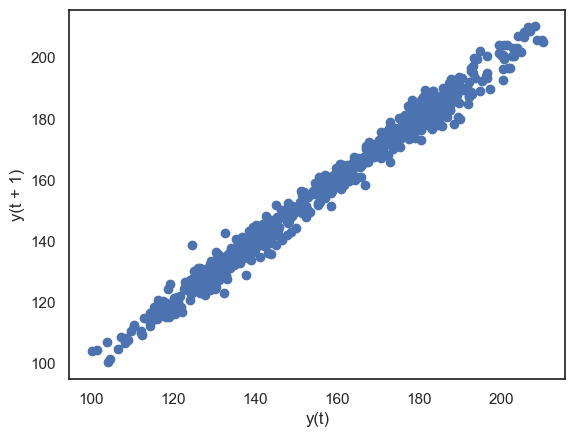

In [35]:
# Paso 19: Importar gáfico de lag para analizar la variable y


from pandas.plotting import lag_plot

lag_plot(acciona.close)

In [36]:
# Paso 20: Importar modelo de autoregresión

from statsmodels.tsa.ar_model import AutoReg as AR

In [37]:
# Paso 21: Generar split para el entrenamiento y el testeo

train, test = acciona.close[:-10], acciona.close[-10:]

train.shape, test.shape

((801,), (10,))

In [44]:
# Paso 22: Entrenar modelo de autoregresión

modelo = AR(train, lags=1).fit()

c:\Users\javie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
# Paso 23: Realizar la predicción del modelo AR

pred = modelo.predict(len(train), len(acciona.close)-1)

len(pred)


c:\Users\javie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


10

In [42]:
# Paso 24: Chequear la predicción

pred

801    109.409826
802    109.668125
803    109.924908
804    110.180184
805    110.433962
806    110.686251
807    110.937058
808    111.186394
809    111.434267
810    111.680684
dtype: float64

In [50]:
# Paso 25: Chequear el testeo

test

date
2024-02-19    107.500000
2024-02-20    108.550003
2024-02-21    108.300003
2024-02-22    106.699997
2024-02-23    104.750000
2024-02-26    101.550003
2024-02-27    104.199997
2024-02-28    100.300003
2024-02-29    104.050003
2024-03-01    107.000000
Name: close, dtype: float64